### Notebook for 6c -- Apr 1 2002

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns   

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MaxAbsScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV, Lasso, Ridge, MultiTaskElasticNetCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from yellowbrick.regressor import ResidualsPlot


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier

import joblib

import matplotlib.patches as mpatches

from sklearn.tree import export_graphviz
import pydot

In [2]:
nlms = pd.read_csv('data/NLMS_PublicUse_5.1/6c_new.csv', index_col='record');

In [3]:
nlms.columns

Index(['age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob', 'wt',
       'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind', 'esr',
       'urban', 'smsast', 'inddea', 'cause113', 'follow', 'dayod', 'hosp',
       'hospd', 'ssnyn', 'vt', 'histatus', 'hitype', 'povpct', 'stater',
       'rcow', 'tenure', 'citizen', 'health', 'indalg', 'smok100', 'agesmk',
       'smokstat', 'smokhome', 'curruse', 'everuse'],
      dtype='object')

In [4]:
cols = ['age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob',
       'wt', 'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind',
       'esr', 'urban', 'smsast', 'inddea', 'cause113', 'follow', 'dayod',
       'hosp', 'hospd', 'ssnyn', 'vt', 'histatus', 'hitype', 'povpct',
       'stater', 'rcow', 'tenure', 'citizen', 'health', 'indalg', 'smok100',
       'agesmk', 'smokstat', 'smokhome', 'curruse', 'everuse']

In [5]:
col_dict = {'index': 'record number', 'age': 'age at time of interview', 'race': 'race', 'sex': 'gender', 
            'ms': 'marital status', 'hisp': 'hispanic', 'adjinc': 'inflation adjusted income', 'educ': 'highest grade completed', 
            'pob': 'region of birth', 'wt': 'adjusted weight', 'hhid': 'household ID number', 'hhnum': 'number of people in household',
            'reltrf': 'relationship to reference person', 'occ': '4 digit occupation code', 'majocc': 'major occupation code',
            'ind': '4 digit industry code', 'majind': 'major industry code', 'esr': 'employment status recode', 
            'urban': 'urban / rural status', 'smsast': 'SMSAST (Standard Metropolitan Statistical Area) status', 'inddea': 'death indicator',
            'cause113': 'cause of death', 'follow': 'length of follow-up', 'dayod': 'day of week of death', 
            'hosp': 'hospital type', 'hosppd': 'hospital death indicator', 'ssnyn': 'presence of ssn', 
            'vt': 'veteran status', 'histatus': 'health insurance status', 'hitype': 'health insurance type', 
            'povpct': 'income as percent of poverty level', 'stater': 'state recode', 'rcow': 'recoded class of worker', 
            'tenure': 'housing tenure', 'citizen': 'citizenship', 'health': 'health', 'indalg': 'indicator of algorithmic death', 
            'smok100': 'smoked more than 100 cigarettes', 'agesmk': 'age started smoking',
            'smokstat': 'cigarette smoking status', 'smokhome': 'rules for smoking cigarettes in the home', 
            'curruse': 'currently use smokeless tobacco', 'everuse': 'ever use smokeless tobacco'}

In [6]:
nlms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745162 entries, 610900 to 483400
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   age       745162 non-null  int64  
 1   race      745069 non-null  float64
 2   sex       745162 non-null  int64  
 3   ms        560324 non-null  float64
 4   hisp      735206 non-null  float64
 5   adjinc    744276 non-null  float64
 6   educ      560324 non-null  float64
 7   pob       745162 non-null  int64  
 8   wt        745162 non-null  int64  
 9   hhid      745162 non-null  int64  
 10  hhnum     745162 non-null  int64  
 11  reltrf    745162 non-null  int64  
 12  occ       377242 non-null  float64
 13  majocc    377242 non-null  float64
 14  ind       377242 non-null  float64
 15  majind    377242 non-null  float64
 16  esr       557195 non-null  float64
 17  urban     715301 non-null  float64
 18  smsast    603623 non-null  float64
 19  inddea    745162 non-null  int64  
 20 

In [7]:
lens = nlms.apply(lambda x: len(x.unique()))
lens

age             91
race             6
sex              2
ms               6
hisp             4
adjinc          15
educ            12
pob             64
wt            2110
hhid        266422
hhnum           16
reltrf           6
occ            506
majocc          12
ind            265
majind          15
esr              6
urban            3
smsast           4
inddea           2
cause113       100
follow        2193
dayod            8
hosp             7
hospd            5
ssnyn            2
vt               3
histatus         2
hitype           6
povpct          22
stater          51
rcow             6
tenure           3
citizen          6
health           6
indalg           3
smok100          1
agesmk           1
smokstat         1
smokhome         1
curruse          1
everuse          1
dtype: int64

In [8]:
nlms.pob.unique()

array([922,   0, 901, 960, 104, 927, 934, 109, 913, 925, 947, 905, 917,
       935, 106, 926, 920, 930, 906, 928, 904, 951, 936, 937, 954, 912,
       918, 923, 919, 103, 948, 111, 955, 921, 911, 939, 102, 924, 940,
       902, 953, 908, 909, 931, 956, 949, 105, 108, 916, 915, 941, 944,
       938, 942, 932, 946, 950, 107, 945, 101, 110, 910, 933, 929])

In [9]:
pob_dict = {909: 'CT',   0: np.nan, 942: 'PA', 928: 'MS', 917: 'IL', 925: 'MA', 104: 'Western Europe', 111: 'Other NS', 934: 'NJ', 945: 'SC', 936: 'NY', 944: 'RI', 107: 'Central America',
       927: 'MN', 926: 'MI', 948: 'TX', 906: 'CA', 950: 'VT', 937: 'NC', 911: 'DC', 933: 'NH', 939: 'OH', 106: 'South America', 109: 'Island Country', 912: 'FL', 108: 'Mexico',
       913: 'GA', 102: 'Asia', 949: 'UT', 103: 'Eastern Europe', 931: 'NE', 954: 'WV', 951: 'VA', 924: 'MD', 901: 'AL', 918: 'IN', 938: 'ND', 956: 'WY', 923: 'ME',
       947: 'TN', 921: 'KY', 101: 'Africa', 105: 'North Am, Not US or Mexico', 955: 'WI', 941: 'OR', 953: 'WA', 905: 'AR', 902: 'AK', 920: 'KS', 915: 'HI', 904: 'AZ', 930: 'MT',
       922: 'LA', 940: 'OK', 932: 'NV', 908: 'CO', 910: 'DE', 946: 'SD', 935: 'NM', 110: 'Other NS', 919: 'IA', 916: 'ID', 929: 'MO', 960: 'American Samoa'}

In [10]:
print('Pre na qty: ' + str(nlms.isnull().sum() * 100 / len(nlms)))

Pre na qty: age           0.000000
race          0.012481
sex           0.000000
ms           24.805076
hisp          1.336085
adjinc        0.118900
educ         24.805076
pob           0.000000
wt            0.000000
hhid          0.000000
hhnum         0.000000
reltrf        0.000000
occ          49.374498
majocc       49.374498
ind          49.374498
majind       49.374498
esr          25.224985
urban         4.007317
smsast       18.994393
inddea        0.000000
cause113      0.000000
follow        0.000000
dayod        96.721250
hosp         96.984146
hospd        96.984146
ssnyn         0.000000
vt           27.408939
histatus      0.000000
hitype        0.000000
povpct        2.590980
stater        0.000000
rcow         50.928523
tenure        0.000000
citizen       6.963989
health       10.222609
indalg       94.207971
smok100     100.000000
agesmk      100.000000
smokstat    100.000000
smokhome    100.000000
curruse     100.000000
everuse     100.000000
dtype: float64


In [11]:
nlms.follow.value_counts(normalize=True)

2192    0.967212
1492    0.000032
656     0.000031
379     0.000030
710     0.000030
          ...   
1502    0.000004
199     0.000004
1292    0.000004
1800    0.000004
1439    0.000004
Name: follow, Length: 2193, dtype: float64

In [12]:
nlms.drop(columns=['smok100', 'agesmk', 'smokstat', 'smokhome', 'curruse', 'everuse'], inplace=True)

In [13]:
nlms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745162 entries, 610900 to 483400
Data columns (total 36 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   age       745162 non-null  int64  
 1   race      745069 non-null  float64
 2   sex       745162 non-null  int64  
 3   ms        560324 non-null  float64
 4   hisp      735206 non-null  float64
 5   adjinc    744276 non-null  float64
 6   educ      560324 non-null  float64
 7   pob       745162 non-null  int64  
 8   wt        745162 non-null  int64  
 9   hhid      745162 non-null  int64  
 10  hhnum     745162 non-null  int64  
 11  reltrf    745162 non-null  int64  
 12  occ       377242 non-null  float64
 13  majocc    377242 non-null  float64
 14  ind       377242 non-null  float64
 15  majind    377242 non-null  float64
 16  esr       557195 non-null  float64
 17  urban     715301 non-null  float64
 18  smsast    603623 non-null  float64
 19  inddea    745162 non-null  int64  
 20 

In [14]:
nlms.shape

(745162, 36)

### DataFrame for deceased individuals

In [15]:
dec = nlms[nlms.dayod.isin([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])]


In [16]:
causes_dict_ref = {1: 'Infectious Disease', 2: 'Malignant or Other Neoplasm', 3: 'Nutrition-Related', 4: 'NeuroMuscular', 
                   5: 'Cardiovascular or Circulatory', 6: 'Respiratory', 7: 'Liver or Kidney', 8: 'Pregnancy or Birth', 
                  9: 'Otherwise Unspecified', 10: 'Accidental Harm', 11: 'Intentional Harm'}
causes_dict = {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 
               18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 
               34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 
               42: 3, 43: 3, 44: 3, 45: 3, 46: 4, 47: 4, 48: 4, 49: 5, 50: 5, 51: 5, 
               52: 5, 53: 5, 54: 5, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 5, 61: 5, 62: 5, 63: 5, 64: 5, 65: 5, 
               66: 6, 67: 6, 68: 6, 69: 6, 70: 6, 71: 6, 72: 6, 73: 6, 74: 6, 75: 6, 76: 6, 80: 7, 
               81: 7, 82: 7, 83: 7, 84: 7, 85: 7, 86: 7, 87: 7, 88: 7, 89: 7, 90: 8, 91: 8, 92: 8, 93: 8, 77: 9, 78: 9, 79: 9, 94: 9, 95: 9, 
               96: 10, 97: 10, 98: 10, 99: 10, 100: 10, 101: 10, 102: 10, 103: 10, 104: 10, 113: 10, 105: 11, 
               106: 11, 107: 11, 108: 11, 109: 11, 110: 11, 111: 11, 112: 11}

In [17]:
dec.cause113.replace(causes_dict, inplace=True)


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [18]:
dec.cause113.unique()

array([ 2,  5,  4,  9,  6,  7,  3, 10,  1, 11,  0,  8])

In [19]:
dec.shape

(24432, 36)

In [20]:
dec

,age,race,sex,ms,hisp,adjinc,educ,pob,wt,hhid,...,vt,histatus,hitype,povpct,stater,rcow,tenure,citizen,health,indalg
record,,,,,,,,,,,,,,,,,,,,,
610904,69,1.0,2,2.0,3.0,3.0,8.0,0,551,2,...,0.0,1,1,6.0,63,NaN,1,NaN,5.0,1.0
610939,89,1.0,2,2.0,3.0,2.0,4.0,901,625,16,...,0.0,1,1,3.0,63,NaN,1,1.0,5.0,1.0
610942,70,2.0,1,1.0,3.0,10.0,8.0,960,330,18,...,1.0,1,1,1.0,63,NaN,1,1.0,NaN,1.0
610967,74,1.0,1,1.0,3.0,7.0,8.0,901,539,29,...,1.0,1,1,12.0,63,NaN,1,1.0,4.0,1.0
610969,67,1.0,1,2.0,3.0,7.0,11.0,0,446,30,...,1.0,1,1,15.0,63,NaN,3,NaN,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536595,72,1.0,2,1.0,3.0,5.0,11.0,103,344,266232,...,0.0,1,1,6.0,16,NaN,1,NaN,3.0,1.0
536603,76,1.0,2,5.0,3.0,6.0,8.0,960,364,266236,...,0.0,1,1,9.0,16,NaN,1,NaN,5.0,1.0
483212,54,1.0,1,1.0,3.0,14.0,11.0,960,233,266352,...,0.0,1,4,21.0,16,1.0,1,NaN,NaN,1.0


In [21]:
dec.shape

(24432, 36)

#### Pipeline for Processing

In [22]:
cols_to_drop = ['hhid', 'reltrf', 'occ', 'majocc', 'majind', 'ind', 'smsast', 
                'inddea', 'follow', 'hospd', 'stater', 'health', 'indalg',
               'citizen', 'rcow', 'wt']

In [23]:
dec.drop(columns=cols_to_drop, inplace=True, axis=1);

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
dec.drop(columns=['esr', 'hosp', 'vt', 'povpct', 'histatus'], inplace=True)

In [25]:
dec

,age,race,sex,ms,hisp,adjinc,educ,pob,hhnum,urban,cause113,dayod,ssnyn,hitype,tenure
record,,,,,,,,,,,,,,,
610904,69,1.0,2,2.0,3.0,3.0,8.0,0,1,1.0,2,4.0,0,1,1
610939,89,1.0,2,2.0,3.0,2.0,4.0,901,2,1.0,5,6.0,1,1,1
610942,70,2.0,1,1.0,3.0,10.0,8.0,960,5,1.0,2,5.0,0,1,1
610967,74,1.0,1,1.0,3.0,7.0,8.0,901,2,1.0,5,7.0,1,1,1
610969,67,1.0,1,2.0,3.0,7.0,11.0,0,5,1.0,5,3.0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536595,72,1.0,2,1.0,3.0,5.0,11.0,103,2,1.0,10,3.0,0,1,1
536603,76,1.0,2,5.0,3.0,6.0,8.0,960,1,1.0,3,1.0,0,1,1
483212,54,1.0,1,1.0,3.0,14.0,11.0,960,4,1.0,11,4.0,1,4,1


In [26]:
dec.drop(columns=['ssnyn'], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
dec.isnull().sum(), len(dec)

(age           0
 race          0
 sex           0
 ms          432
 hisp        538
 adjinc       23
 educ        432
 pob           0
 hhnum         0
 urban       915
 cause113      0
 dayod         0
 hitype        0
 tenure        0
 dtype: int64,
 24432)

In [67]:
cat_cols = ['race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob', 'hhnum', 'urban', 'cause113', 'dayod', 'hitype', 'tenure']
num_cols = ['age']

In [68]:
imputer_cat = KNNImputer(n_neighbors=1)

In [69]:
cat_df_imp = pd.DataFrame(imputer_cat.fit_transform(dec[cat_cols]), 
                          columns=cat_cols, index=dec.index)

In [70]:
imputer_num = KNNImputer(n_neighbors=3)

In [71]:
num_df_imp = pd.DataFrame(imputer_num.fit_transform
                          (dec[num_cols]), 
                          columns=num_cols, 
                          index=dec.index)

In [72]:
num_df_imp.shape, cat_df_imp.shape

((24432, 1), (24432, 13))

In [73]:
num_indices = num_df_imp.index.to_list()

In [74]:
cat_indices = cat_df_imp.index.to_list()

In [75]:
len(list(set(num_indices) - set(cat_indices)))

0

In [76]:
df = num_df_imp.merge(cat_df_imp, how='inner', left_index=True, right_index=True)


In [77]:
df

,age,race,sex,ms,hisp,adjinc,educ,pob,hhnum,urban,cause113,dayod,hitype,tenure
record,,,,,,,,,,,,,,
610904,69.0,1.0,2.0,2.0,3.0,3.0,8.0,0.0,1.0,1.0,2.0,4.0,1.0,1.0
610939,89.0,1.0,2.0,2.0,3.0,2.0,4.0,901.0,2.0,1.0,5.0,6.0,1.0,1.0
610942,70.0,2.0,1.0,1.0,3.0,10.0,8.0,960.0,5.0,1.0,2.0,5.0,1.0,1.0
610967,74.0,1.0,1.0,1.0,3.0,7.0,8.0,901.0,2.0,1.0,5.0,7.0,1.0,1.0
610969,67.0,1.0,1.0,2.0,3.0,7.0,11.0,0.0,5.0,1.0,5.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536595,72.0,1.0,2.0,1.0,3.0,5.0,11.0,103.0,2.0,1.0,10.0,3.0,1.0,1.0
536603,76.0,1.0,2.0,5.0,3.0,6.0,8.0,960.0,1.0,1.0,3.0,1.0,1.0,1.0
483212,54.0,1.0,1.0,1.0,3.0,14.0,11.0,960.0,4.0,1.0,11.0,4.0,4.0,1.0


In [99]:
X = df.copy()

In [100]:
dec.columns

Index(['age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob', 'hhnum',
       'urban', 'cause113', 'dayod', 'hitype', 'tenure'],
      dtype='object')

In [101]:
X

,age,race,sex,ms,hisp,adjinc,educ,pob,hhnum,urban,cause113,dayod,hitype,tenure
record,,,,,,,,,,,,,,
610904,69.0,1.0,2.0,2.0,3.0,3.0,8.0,0.0,1.0,1.0,2.0,4.0,1.0,1.0
610939,89.0,1.0,2.0,2.0,3.0,2.0,4.0,901.0,2.0,1.0,5.0,6.0,1.0,1.0
610942,70.0,2.0,1.0,1.0,3.0,10.0,8.0,960.0,5.0,1.0,2.0,5.0,1.0,1.0
610967,74.0,1.0,1.0,1.0,3.0,7.0,8.0,901.0,2.0,1.0,5.0,7.0,1.0,1.0
610969,67.0,1.0,1.0,2.0,3.0,7.0,11.0,0.0,5.0,1.0,5.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536595,72.0,1.0,2.0,1.0,3.0,5.0,11.0,103.0,2.0,1.0,10.0,3.0,1.0,1.0
536603,76.0,1.0,2.0,5.0,3.0,6.0,8.0,960.0,1.0,1.0,3.0,1.0,1.0,1.0
483212,54.0,1.0,1.0,1.0,3.0,14.0,11.0,960.0,4.0,1.0,11.0,4.0,4.0,1.0


In [102]:
# Split before preprocessing
age_label = X.pop('age')
cod_label = X.pop('cause113')
dayod_label = X.pop('dayod')
dec_features = X[['race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'hitype', 'hhnum', 'pob', 'urban', 'tenure']]

In [103]:
dec_features

,race,sex,ms,hisp,adjinc,educ,hitype,hhnum,pob,urban,tenure
record,,,,,,,,,,,
610904,1.0,2.0,2.0,3.0,3.0,8.0,1.0,1.0,0.0,1.0,1.0
610939,1.0,2.0,2.0,3.0,2.0,4.0,1.0,2.0,901.0,1.0,1.0
610942,2.0,1.0,1.0,3.0,10.0,8.0,1.0,5.0,960.0,1.0,1.0
610967,1.0,1.0,1.0,3.0,7.0,8.0,1.0,2.0,901.0,1.0,1.0
610969,1.0,1.0,2.0,3.0,7.0,11.0,1.0,5.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
536595,1.0,2.0,1.0,3.0,5.0,11.0,1.0,2.0,103.0,1.0,1.0
536603,1.0,2.0,5.0,3.0,6.0,8.0,1.0,1.0,960.0,1.0,1.0
483212,1.0,1.0,1.0,3.0,14.0,11.0,4.0,4.0,960.0,1.0,1.0


In [104]:
age_label.isnull().sum(), cod_label.isnull().sum(), dayod_label.isnull().sum(), dec_features.isnull().sum()

(0,
 0,
 0,
 race      0
 sex       0
 ms        0
 hisp      0
 adjinc    0
 educ      0
 hitype    0
 hhnum     0
 pob       0
 urban     0
 tenure    0
 dtype: int64)

#### Age Predictor

In [105]:
# tts for age predictor
X_train, X_test, y_train, y_test = train_test_split(dec_features, age_label, test_size=0.2, random_state=42)

In [106]:
model_knn = KNeighborsRegressor(n_neighbors=3)

In [107]:
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [108]:
predict_train_knn = model_knn.predict(X_train)
predict_test_knn = model_knn.predict(X_test)

In [109]:
print('MSE on Train Data with RF: ', mean_squared_error(y_train, predict_train_knn))
print('RMSE on Train Data with RF: ', mean_squared_error(y_train, predict_train_knn, squared=False))
print('R_squared on Train Data with RF: ', r2_score(y_train, predict_train_knn))
print('\n')
print('MSE on Test Data with RF: ', mean_squared_error(y_test, predict_test_knn))
print('RMSE on Test Data with RF: ', mean_squared_error(y_test, predict_test_knn, squared=False))
print('R_squared on Train Data with RF: ', r2_score(y_test, predict_test_knn))

MSE on Train Data with RF:  92.35571473238394
RMSE on Train Data with RF:  9.610188069563673
R_squared on Train Data with RF:  0.7095372104346649


MSE on Test Data with RF:  184.95959802651026
RMSE on Test Data with RF:  13.599985221554848
R_squared on Train Data with RF:  0.462468817827683


In [110]:
model_lass0 = Lasso()

In [111]:
model_lass0.fit(X_train, y_train)

Lasso()

In [112]:
predict_train_lasso = model_lass0.predict(X_train)
predict_test_lasso = model_lass0.predict(X_test)

In [113]:
print('MSE on Train Data with Lasso: ', mean_squared_error(y_train, predict_train_lasso))
print('RMSE on Train Data with Lasso: ', mean_squared_error(y_train, predict_train_lasso, squared=False))
print('R_squared on Train Data with Lasso: ', r2_score(y_train, predict_train_lasso))
print('\n')
print('MSE on Test Data with Lasso: ', mean_squared_error(y_test, predict_test_lasso))
print('RMSE on Test Data with Lasso: ', mean_squared_error(y_test, predict_test_lasso, squared=False))
print('R_squared on Train Data with Lasso: ', r2_score(y_test, predict_test_lasso))

MSE on Train Data with Lasso:  205.9410840028783
RMSE on Train Data with Lasso:  14.350647511623938
R_squared on Train Data with Lasso:  0.3523062225340544


MSE on Test Data with Lasso:  221.94962455440705
RMSE on Test Data with Lasso:  14.897973840573323
R_squared on Train Data with Lasso:  0.35496808307113437


In [114]:
model = RandomForestRegressor(n_estimators=400, max_depth=40, random_state=42)

In [115]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, n_estimators=400, random_state=42)

In [116]:
predict_train = model.predict(X_train)

In [117]:
predict_test = model.predict(X_test)

In [118]:
print('MSE on Train Data with RF: ', mean_squared_error(y_train, predict_train))
print('RMSE on Train Data with RF: ', mean_squared_error(y_train, predict_train, squared=False))
print('R_squared on Train Data with RF: ', r2_score(y_train, predict_train))
print('\n')
print('MSE on Test Data with RF: ', mean_squared_error(y_test, predict_test))
print('RMSE on Test Data with RF: ', mean_squared_error(y_test, predict_test, squared=False))
print('R_squared on Train Data with RF: ', r2_score(y_test, predict_test))

MSE on Train Data with RF:  29.641507605669627
RMSE on Train Data with RF:  5.4444014919612265
R_squared on Train Data with RF:  0.9067761533651373


MSE on Test Data with RF:  133.2874416707304
RMSE on Test Data with RF:  11.54501804549176
R_squared on Train Data with RF:  0.612638885170358


In [119]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19545, 11), (4887, 11), (19545,), (4887,))

In [120]:
X_train

,race,sex,ms,hisp,adjinc,educ,hitype,hhnum,pob,urban,tenure
record,,,,,,,,,,,
622967,1.0,1.0,1.0,3.0,6.0,5.0,1.0,2.0,921.0,1.0,1.0
540929,2.0,2.0,1.0,3.0,7.0,7.0,1.0,4.0,960.0,1.0,1.0
52457,1.0,2.0,2.0,3.0,14.0,8.0,5.0,2.0,912.0,1.0,1.0
727474,1.0,1.0,1.0,3.0,8.0,11.0,1.0,2.0,0.0,2.0,1.0
384528,1.0,2.0,2.0,3.0,6.0,11.0,1.0,2.0,960.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
551612,1.0,1.0,2.0,3.0,9.0,12.0,1.0,1.0,960.0,1.0,1.0
36345,1.0,2.0,1.0,3.0,6.0,8.0,4.0,3.0,0.0,2.0,2.0
633419,1.0,2.0,1.0,3.0,6.0,4.0,1.0,3.0,921.0,2.0,1.0


In [121]:
X_train.shape

(19545, 11)

In [122]:
y_train

record
622967    71.0
540929    69.0
52457     90.0
727474    53.0
384528    54.0
          ... 
551612    80.0
36345     41.0
633419    76.0
351266    49.0
520113    85.0
Name: age, Length: 19545, dtype: float64

In [123]:
pal = sns.color_palette("Blues")
print(pal.as_hex())

['#dbe9f6', '#bad6eb', '#89bedc', '#539ecd', '#2b7bba', '#0b559f']


Text(0.5, 1.0, 'Residuals Plot for Random Forest Regressor Model')

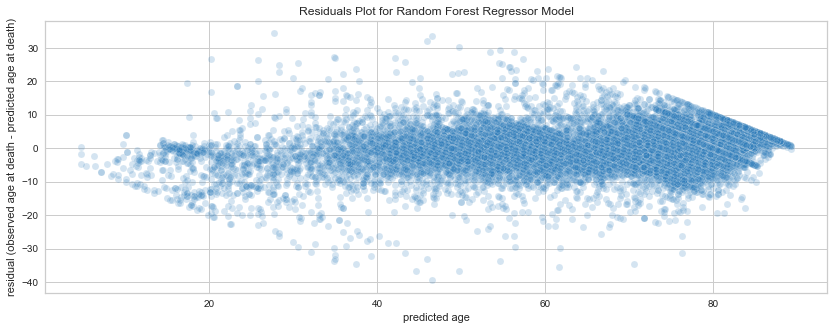

In [124]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.scatterplot(x=predict_train, y=(y_train - predict_train), ax=ax, alpha=0.2, color='#2b7bba');
ax.set_xlabel('predicted age')
ax.set_ylabel('residual (observed age at death - predicted age at death)')
ax.set_title('Residuals Plot for Random Forest Regressor Model')

Text(0.5, 1.0, 'Predicted v. Actual Plot for Random Forest Regressor Model, Training Set')

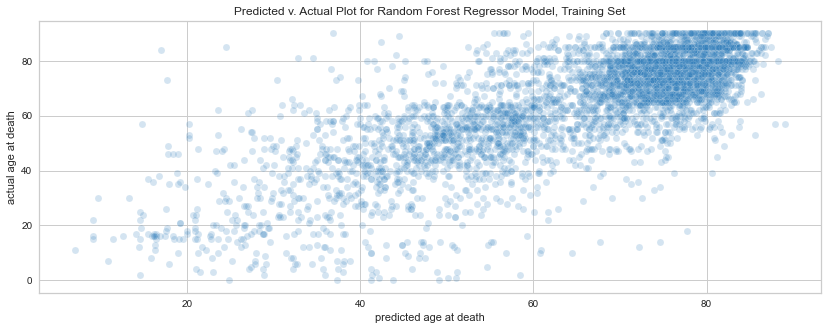

In [125]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.scatterplot(x=predict_test, y=y_test, ax=ax, alpha=0.2, color='#2b7bba');
ax.set_xlabel('predicted age at death')
ax.set_ylabel('actual age at death')
ax.set_title('Predicted v. Actual Plot for Random Forest Regressor Model, Training Set')

In [126]:
mae_train = mean_absolute_error(y_train, predict_train)
mae_test = mean_absolute_error(y_test, predict_test)
print('MAE on Training Set: ', mae_train)
print('MAE on Test Set: ', mae_test)

MAE on Training Set:  3.9133444266005233
MAE on Test Set:  8.388343697952976


In [127]:
feature_importances = pd.DataFrame(model.fit(X_train, y_train).feature_importances_,
                                   index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

In [128]:
feature_importances.head(20)

,importance
hitype,0.373336
hhnum,0.145784
ms,0.145660
adjinc,0.095500
educ,0.078142
pob,0.057985
tenure,0.027062
race,0.022661
sex,0.021544
urban,0.019705


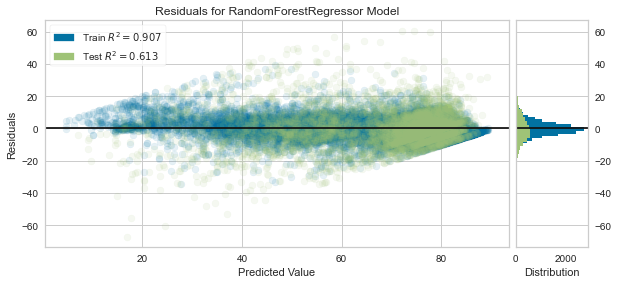

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [129]:
visualizer = ResidualsPlot(model, train_alpha=0.1, test_alpha=0.1, size=(700, 300))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

Predicting on User Input: 

In [130]:
cols = X_train.columns.to_list()
cols

['race',
 'sex',
 'ms',
 'hisp',
 'adjinc',
 'educ',
 'hitype',
 'hhnum',
 'pob',
 'urban',
 'tenure']

In [93]:
X_train.race.unique()

array([1., 2., 5., 4., 3.])

In [94]:
race_dict = {1.0: 'White', 2.0: 'African American', 3.0: 'Am Indian or Alaskan Native', 4.0: 'Asian or Pacific Islander'}

In [95]:
X_train.sex.unique()

array([1., 2.])

In [96]:
sex_dict = {1.0: 'Male', 2.0: 'Female'}

In [97]:
X_train.ms.unique()

array([1., 2., 5., 3., 4.])

In [98]:
ms_dict = {1.0: 'Married', 2.0: 'Widowed', 
           3.0: 'Divorced', 4.0: 'Separated', 
           5.0: 'Never Married'}

In [99]:
X_train.hisp.unique()

array([3., 1., 2.])

In [100]:
hisp_dict = {1.0: 'Mexican Hispanic', 
             2.0: 'Other Hispanic', 3.0: 'Non-Hispanic'}

In [101]:
X_train.adjinc.unique()

array([ 6.,  7., 14.,  8., 10.,  4.,  2., 13.,  5.,  3.,  9., 11.,  1.,
       12.])

In [102]:
inc_dict = {1.0: '$0-4,999', 
            2.0: '$5,000-7,499', 
            3.0: '$7,500-9,999', 
            4.0: '$10,000-12,499', 
            5.0: '$12,500-14,999', 
            6.0: '$15,000-19,999', 
            7.0: '$20,000-24,999', 
            8.0: '$25,000-29,999', 
            9.0: '$30,000-34,999', 
            10.0: '$35,000-39,999', 
            11.0: '$40,000-49,999', 
            12.0: '$50,000-59,000', 
            13.0: '$60,000-74,999', 
            14.0: 'Over $75,000'}

In [103]:
X_train.educ.unique()

array([ 5.,  7.,  8., 11., 12.,  4., 14.,  6.,  3.,  2.,  1.])

In [104]:
educ_dict = {1.0: 'None', 
            2.0: 'Grade 4', 
            3.0: 'Grade 6', 
            4.0: 'Grade 8', 
            5.0: 'Grade 9', 
            6.0: 'Grade 10', 
            7.0: 'Grade 11', 
            8.0: 'Grade 12', 
            9.0: 'Some Undergrad', 
            10.0: 'Bachelors Degree', 
            11.0: 'Masters Degree', 
            12.0: 'Beyond Masters'}

In [105]:
X_train.hitype.unique()

array([1., 5., 2., 4., 0., 3.])

In [106]:
hitype_dict = {0: 'No Insurance', 1: 'Medicare', 
            2: 'Medicaid', 
            3: 'VA Health Care', 
            4: 'Employer-provided Health Care', 
            5: 'Private Health Care'}

In [113]:
X_train.pob.unique()

array([921., 960., 912.,   0., 920., 928., 906., 108., 104., 102., 927.,
       937., 936., 109., 904., 111., 107., 954., 913., 940., 945., 953.,
       923., 941., 942., 925., 932., 924., 955., 948., 946., 106., 951.,
       939., 901., 917., 950., 919., 922., 926., 938., 105., 909., 918.,
       905., 956., 911., 947., 916., 101., 944., 103., 930., 934., 931.,
       110., 933., 908., 949., 910., 902., 915., 935., 929.])

In [108]:
X_train.loc[622967], y_train.loc[622967]

(race        1.0
 sex         1.0
 ms          1.0
 hisp        3.0
 adjinc      6.0
 educ        5.0
 hitype      1.0
 hhnum       2.0
 pob       921.0
 urban       1.0
 tenure      1.0
 Name: 622967, dtype: float64,
 71.0)

In [109]:
sample = np.array([1, 1, 1, 3, 6, 5, 1, 2, 921, 1, 1])

In [110]:
model.predict(sample.reshape(1, -1))

array([73.30072024])

In [131]:
joblib.dump(model, 'final_model.pkl')


['final_model.pkl']

In [ ]:
# some time later...

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

In [144]:
GBR = GradientBoostingRegressor()

In [145]:
GBR.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor()

In [146]:
predict_train_gbr = GBR.predict(X_train)
predict_test_gbr = GBR.predict(X_test)

In [147]:
print('MSE on Train Data with RF: ', mean_squared_error(y_train, predict_train_gbr))
print('RMSE on Train Data with RF: ', mean_squared_error(y_train, predict_train_gbr, squared=False))
print('R_squared on Train Data with RF: ', r2_score(y_train, predict_train_gbr))
print('\n')
print('MSE on Test Data with RF: ', mean_squared_error(y_test, predict_test_gbr))
print('RMSE on Test Data with RF: ', mean_squared_error(y_test, predict_test_gbr, squared=False))
print('R_squared on Train Data with RF: ', r2_score(y_test, predict_test_gbr))

MSE on Train Data with RF:  138.5139380829712
RMSE on Train Data with RF:  11.769194453443752
R_squared on Train Data with RF:  0.5643675654956257


MSE on Test Data with RF:  152.54616999396364
RMSE on Test Data with RF:  12.350958262173977
R_squared on Train Data with RF:  0.5566690024869015


In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


In [148]:
RF = RandomForestRegressor()

In [217]:
param_grid = { 
    'n_estimators': [200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 20, 30, 100]
}

In [218]:
CV_rf = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5)

In [219]:
CV_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [220]:
CV_rf.best_params_

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}

In [228]:
rf_final = RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=300)

In [229]:
rf_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=300)

In [233]:
train_predictions = rf_final.predict(X_train)

In [234]:
test_predictions = rf_final.predict(X_test)

In [235]:
print('MSE on Train Data with RF: ', mean_squared_error(y_train, train_predictions))
print('RMSE on Train Data with RF: ', mean_squared_error(y_train, train_predictions, squared=False))
print('R_squared on Train Data with RF: ', r2_score(y_train, train_predictions))
print('\n')
print('MSE on Test Data with RF: ', mean_squared_error(y_test, test_predictions))
print('RMSE on Test Data with RF: ', mean_squared_error(y_test, test_predictions, squared=False))
print('R_squared on Train Data with RF: ', r2_score(y_test, test_predictions))

MSE on Train Data with RF:  121.16917228626598
RMSE on Train Data with RF:  11.007686963493555
R_squared on Train Data with RF:  0.6189176176744962


MSE on Test Data with RF:  152.25731873907756
RMSE on Test Data with RF:  12.339259245962763
R_squared on Train Data with RF:  0.5575084645000522
